In [ ]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

file_path = '/content/drive/MyDrive/US_Accidents.csv'
accident_df = pd.read_csv(file_path)


print(accident_df.head())


    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [16]:
accident_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [17]:
accident_df.shape

(7728394, 46)

In [18]:
df.dtypes

,0
ID,object
Source,object
Severity,int64
Start_Time,datetime64[ns]
End_Time,object
Start_Lat,float64
Start_Lng,float64
End_Lat,float64
End_Lng,float64
Distance(mi),float64


**Checking Missing Data**

In [19]:
missing_values = accident_df.isnull().sum()
missing_percent = (missing_values/len(accident_df)*100)

missing_summary = pd.DataFrame({
    'Missing Values' : missing_values,
    'Missing Percent' : missing_percent
})

In [20]:
missing_summary

,Missing Values,Missing Percent
ID,0,0.000000
Source,0,0.000000
Severity,0,0.000000
Start_Time,0,0.000000
End_Time,0,0.000000
Start_Lat,0,0.000000
Start_Lng,0,0.000000
End_Lat,3402762,44.029355
End_Lng,3402762,44.029355
Distance(mi),0,0.000000


In [21]:
# Filter the columns with missing data
missing_summary = missing_summary[missing_summary['Missing Values']>0].sort_values(by='Missing Values', ascending=False)
missing_summary

,Missing Values,Missing Percent
End_Lat,3402762,44.029355
End_Lng,3402762,44.029355
Precipitation(in),2203586,28.512858
Wind_Chill(F),1999019,25.865904
Wind_Speed(mph),571233,7.391355
Visibility(mi),177098,2.291524
Wind_Direction,175206,2.267043
Humidity(%),174144,2.253301
Weather_Condition,173459,2.244438
Temperature(F),163853,2.120143


# Explore severity distribution


In [22]:

print("\nAccident Severity Distribution:")
print(accident_df['Severity'].value_counts().sort_index())


Accident Severity Distribution:
Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64



# Check the unique weather conditions


In [23]:
print("\nUnique Weater Conditions:")
print(accident_df['Weather_Condition'].unique())


Unique Weater Conditions:
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Rain' 'Light Snow' 'Haze'
 'Scattered Clouds' 'Partly Cloudy' 'Clear' 'Snow'
 'Light Freezing Drizzle' 'Light Drizzle' 'Fog' 'Shallow Fog' 'Heavy Rain'
 'Light Freezing Rain' 'Cloudy' 'Drizzle' nan 'Light Rain Showers' 'Mist'
 'Smoke' 'Patches of Fog' 'Light Freezing Fog' 'Light Haze'
 'Light Thunderstorms and Rain' 'Thunderstorms and Rain' 'Fair'
 'Volcanic Ash' 'Blowing Sand' 'Blowing Dust / Windy' 'Widespread Dust'
 'Fair / Windy' 'Rain Showers' 'Mostly Cloudy / Windy'
 'Light Rain / Windy' 'Hail' 'Heavy Drizzle' 'Showers in the Vicinity'
 'Thunderstorm' 'Light Rain Shower' 'Light Rain with Thunder'
 'Partly Cloudy / Windy' 'Thunder in the Vicinity' 'T-Storm'
 'Heavy Thunderstorms and Rain' 'Thunder' 'Heavy T-Storm' 'Funnel Cloud'
 'Heavy T-Storm / Windy' 'Blowing Snow' 'Light Thunderstorms and Snow'
 'Heavy Snow' 'Low Drifting Snow' 'Light Ice Pellets' 'Ice Pellets'
 'Squalls' 'N/A Precipitation' 'Cloudy / Windy' 

## Convert Start_Time to datetime and extract hour for future analysis


In [24]:
accident_df['Start_Time'] = pd.to_datetime(accident_df['Start_Time'], errors='coerce')
accident_df['Hour'] = accident_df['Start_Time'].dt.hour

print("\nSample data with Hour Extracted from Start_Time:")
display(accident_df[['Start_Time', 'Hour']].head())


Sample data with Hour Extracted from Start_Time:


,Start_Time,Hour
0,2016-02-08 05:46:00,5.0
1,2016-02-08 06:07:59,6.0
2,2016-02-08 06:49:27,6.0
3,2016-02-08 07:23:34,7.0
4,2016-02-08 07:39:07,7.0


# Day 4 : Data Visualization

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
print(df.head(2))


    ID   Source  Severity          Start_Time             End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   

   Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Station   Stop  \
0 -84.058723      NaN      NaN          0.01  ...   False  False   
1 -82.831184      NaN      NaN          0.01  ...   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   

  Nautical_Twilight Astronomical_Twilight Hour  
0             Night                 Night  5.0  
1             Night                   Day  6.0  

[2 rows x 47 columns]


In [25]:
# Convert coordinates to numeric (if not already)
accident_df['Start_Lat'] = pd.to_numeric(accident_df['Start_Lat'], errors='coerce')
accident_df['Start_Lng'] = pd.to_numeric(accident_df['Start_Lng'], errors='coerce')

# Drop rows with missing coordinates for geospatial analysis
geo_df = accident_df.dropna(subset=['Start_Lat', 'Start_Lng'])

# geo_df.head()
geo_df.shape


(7728394, 47)

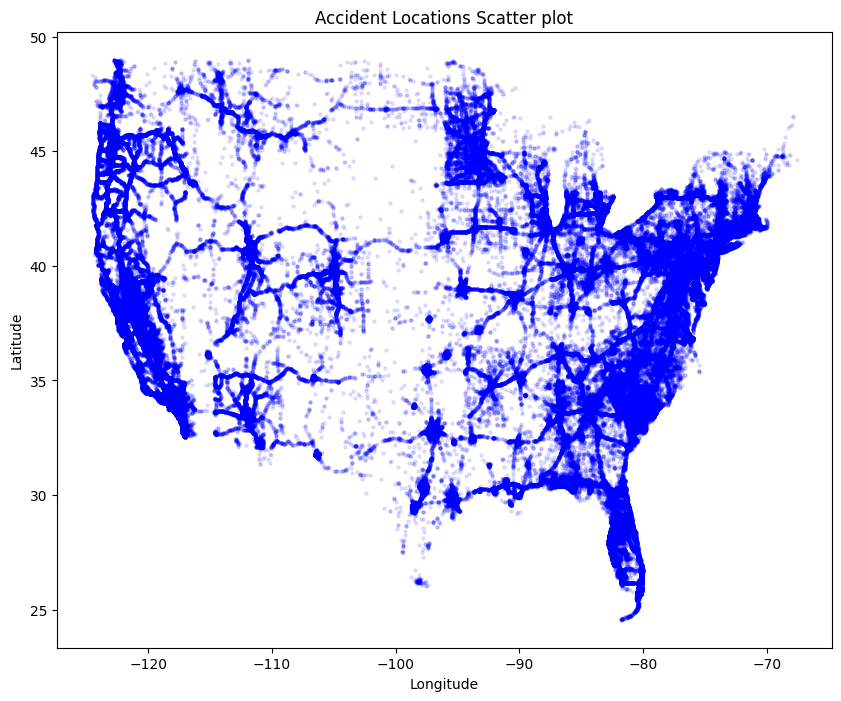

In [27]:
# Visualize accident hotspots - scatter plot for all points(sample due to size)
plt.figure(figsize=(10, 8))
sample_df = geo_df.sample(n=1000000, random_state=42) # Sample for performance
plt.scatter(sample_df['Start_Lng'], sample_df['Start_Lat'], alpha=0.1, s=5, c='blue')
plt.title('Accident Locations Scatter plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/tmp/ipython-input-4181917421.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis')


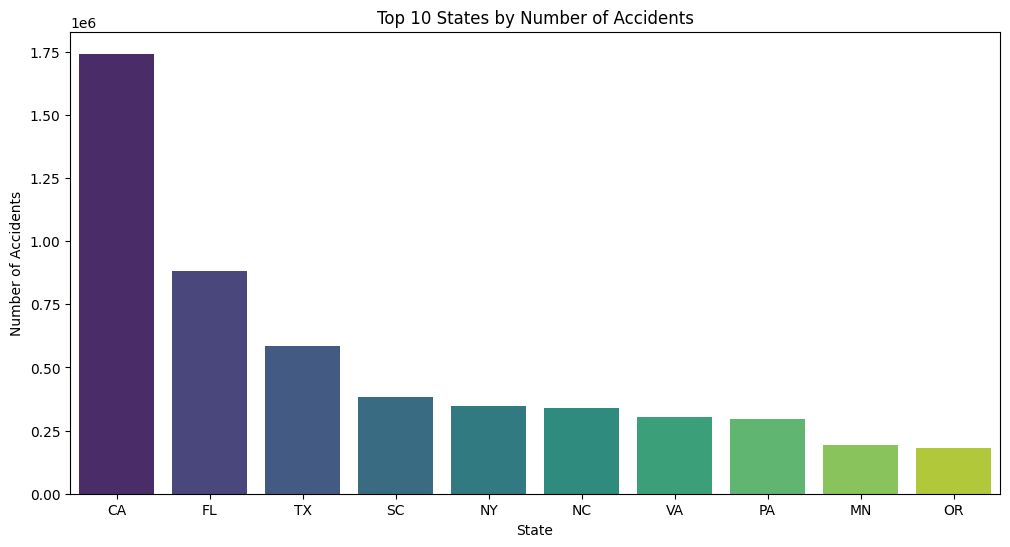

In [28]:
# Density map by State (accident count per state)
state_counts = geo_df['State'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis')
plt.title('Top 10 States by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('State')
plt.show()

/tmp/ipython-input-2887043176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')


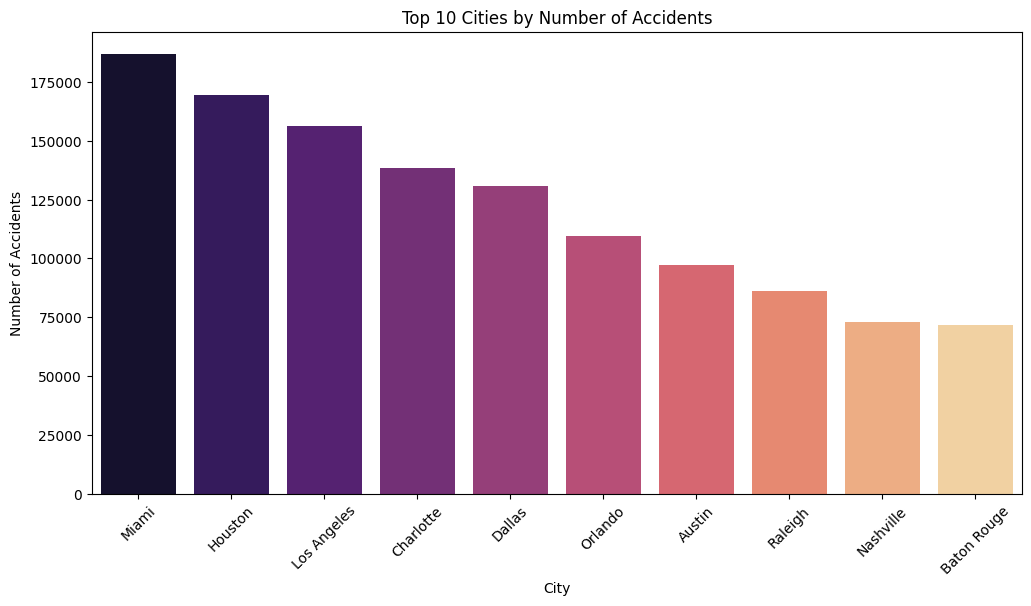

In [29]:
# 3. Density map by City (accident count for top 10 cities)
city_counts = geo_df['City'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')
plt.title('Top 10 Cities by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

In [30]:
# 4. Highlight top 5 most accident-prone states and cities
top_5_states = state_counts.head(5)
top_5_cities = city_counts.head(5)

print("Top 5 Accident-Prone States:")
print(top_5_states)

print("\nTop 5 Accident-Prone Cities:")
print(top_5_cities)


Top 5 Accident-Prone States:
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: count, dtype: int64

Top 5 Accident-Prone Cities:
City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Name: count, dtype: int64


# EDA Interview Questions

**Q1**. What is the distribution of accidents by Hour of the Day?


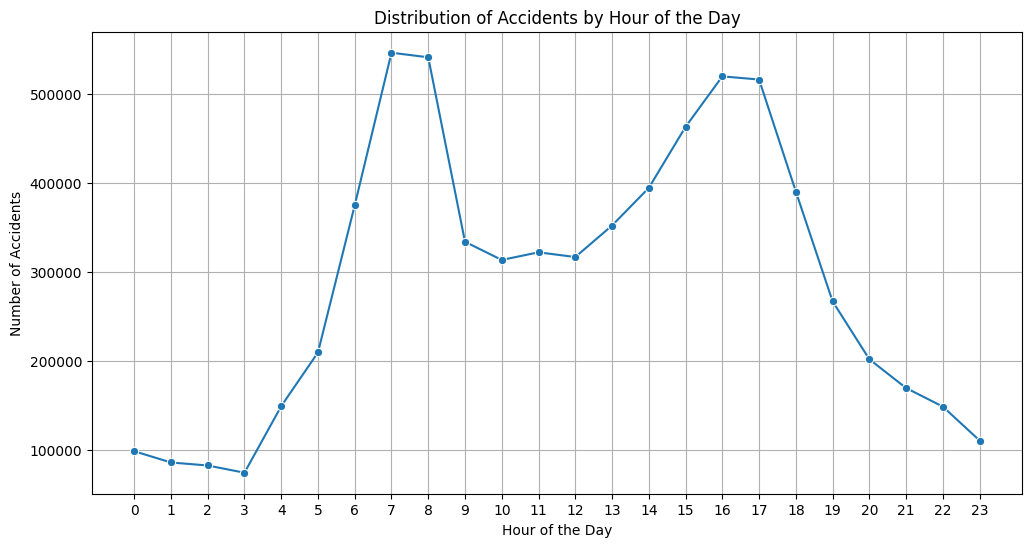

In [31]:
# Convert 'Start_Time' to datetime if not already
accident_df['Start_Time'] = pd.to_datetime(accident_df['Start_Time'], errors='coerce')
# Extract hour from 'Start_Time'
accident_df['Hour'] = accident_df['Start_Time'].dt.hour
# Count accidents by hour
hourly_counts = accident_df['Hour'].value_counts().sort_index()
# Plot the distribution
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Distribution of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Q2**. How does accident severity distribute across different States?

<Figure size 1500x800 with 0 Axes>

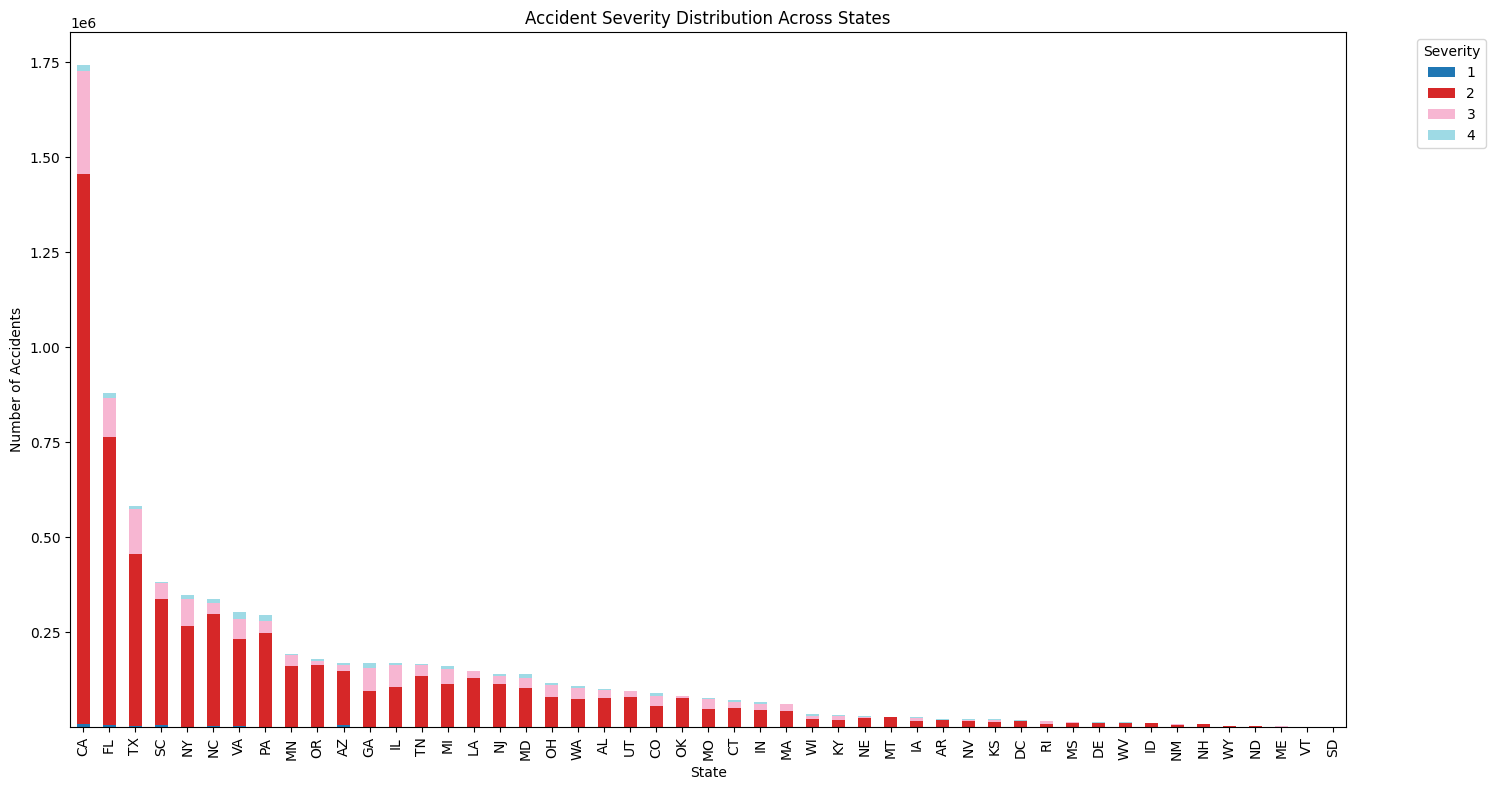

In [32]:
# Count accidents by State and Severity
severity_state_counts = accident_df.groupby(['State', 'Severity']).size().unstack(fill_value=0)
# Plot the distribution
severity_state_counts = severity_state_counts.loc[severity_state_counts.sum(axis=1).sort_values(ascending=False).index]
plt.figure(figsize=(15, 8))
severity_state_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 8))
plt.title('Accident Severity Distribution Across States')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Q3**. What weather conditions are associated with the highest accident severity?


<Figure size 1500x800 with 0 Axes>

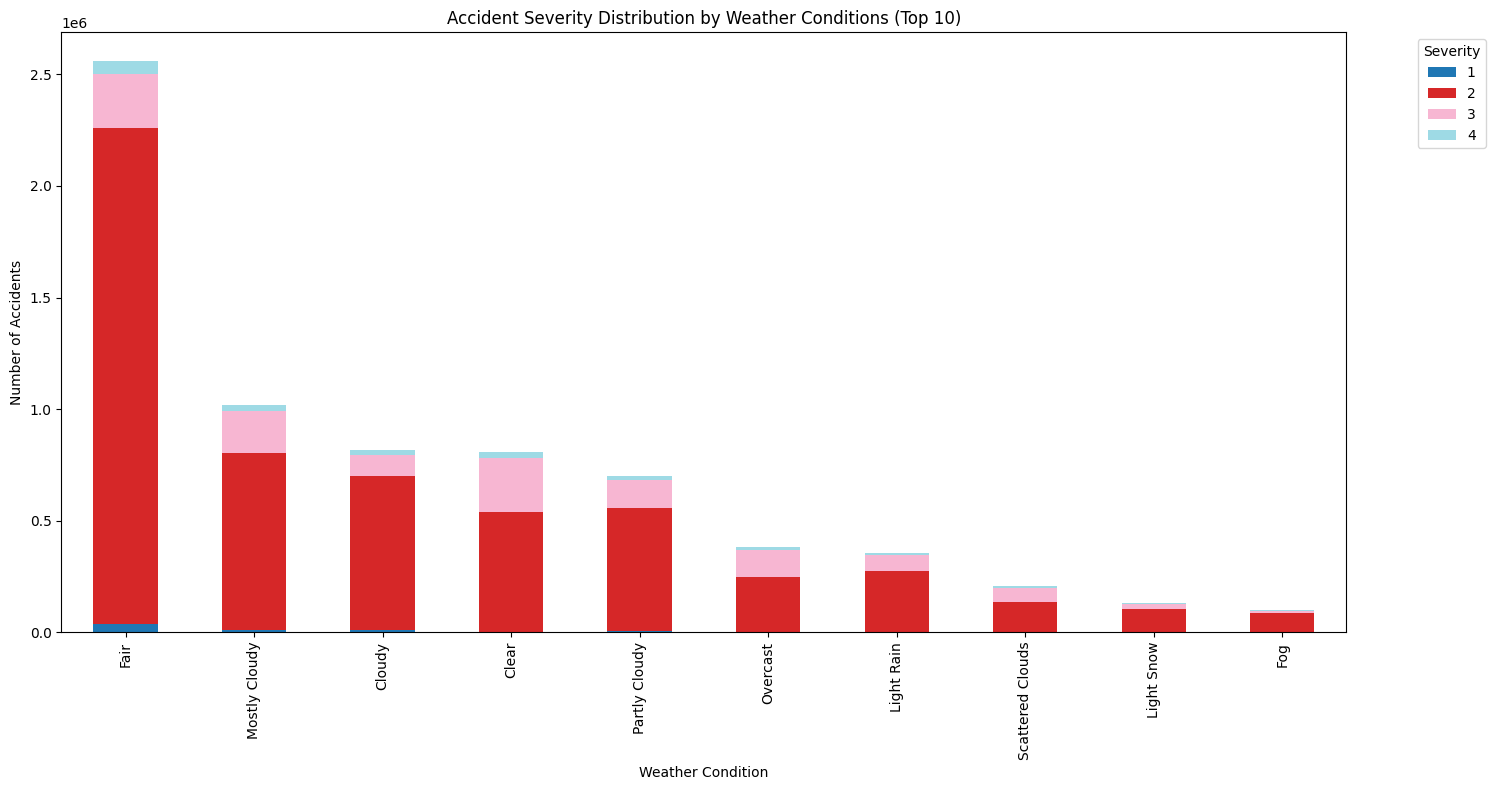

In [33]:
# Count accidents by Weather_Condition and Severity
weather_severity_counts = accident_df.groupby(['Weather_Condition', 'Severity']).size().unstack(fill_value=0)
# Filter to top 10 weather conditions by total accidents
top_weather_conditions = weather_severity_counts.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_weather_severity = weather_severity_counts.loc[top_weather_conditions]
# Plot the distribution
plt.figure(figsize=(15, 8))
filtered_weather_severity.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 8))
plt.title('Accident Severity Distribution by Weather Conditions (Top 10)')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Q4**. How many accidents occur during day vs night? (Sunrise_Sunset column)

/tmp/ipython-input-542094010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_night_counts.index, y=day_night_counts.values, palette='coolwarm')


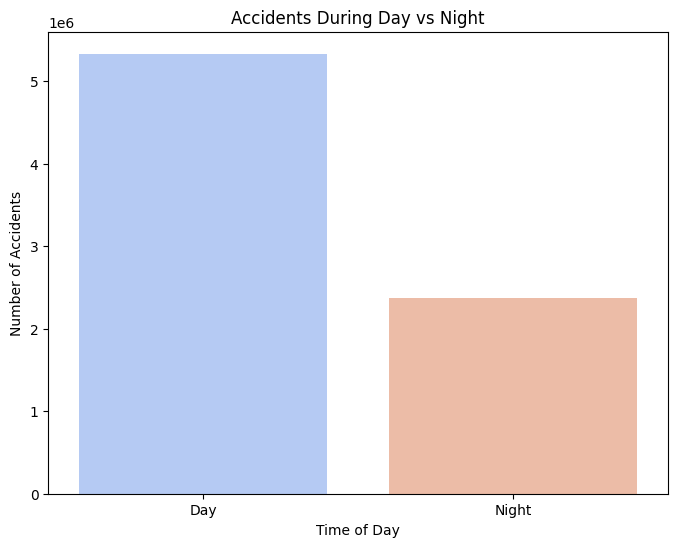

In [34]:
# Count accidents by Sunrise_Sunset
day_night_counts = accident_df['Sunrise_Sunset'].value_counts()
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=day_night_counts.index, y=day_night_counts.values, palette='coolwarm')
plt.title('Accidents During Day vs Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

**Q5**. Distribution of accidents on different days of the week


/tmp/ipython-input-2769553518.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Set2')


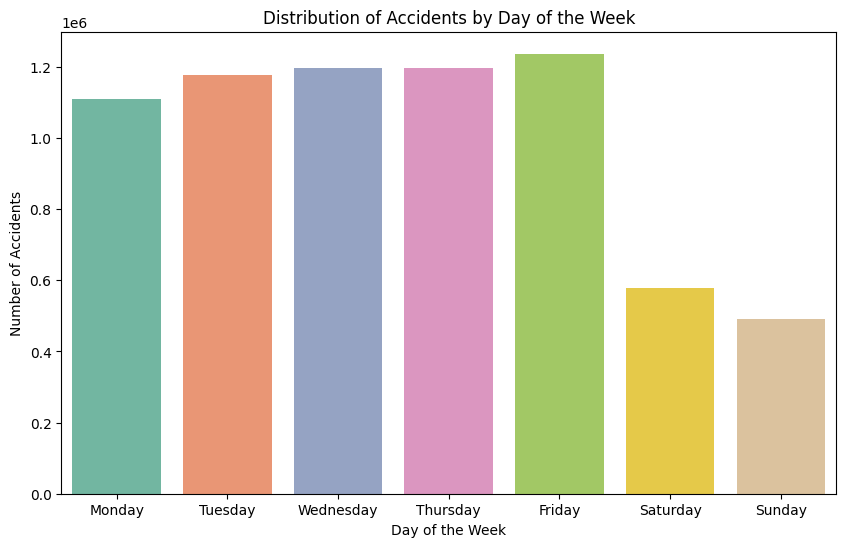

In [35]:
# Extract day of the week from 'Start_Time'
accident_df['Day_of_Week'] = accident_df['Start_Time'].dt.day_name()
# Count accidents by Day_of_Week
day_of_week_counts = accident_df['Day_of_Week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Set2')
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

**Q6**. Are certain traffic features (e.g., Traffic Signal, Stop, Crossing)


/tmp/ipython-input-3987875166.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


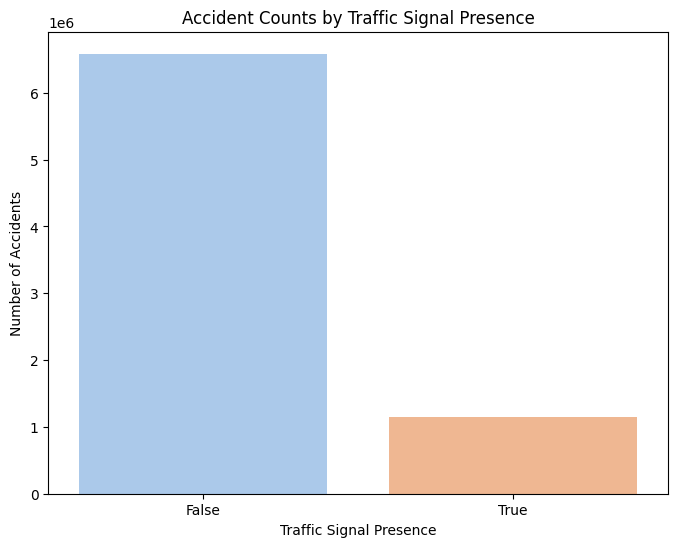

/tmp/ipython-input-3987875166.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


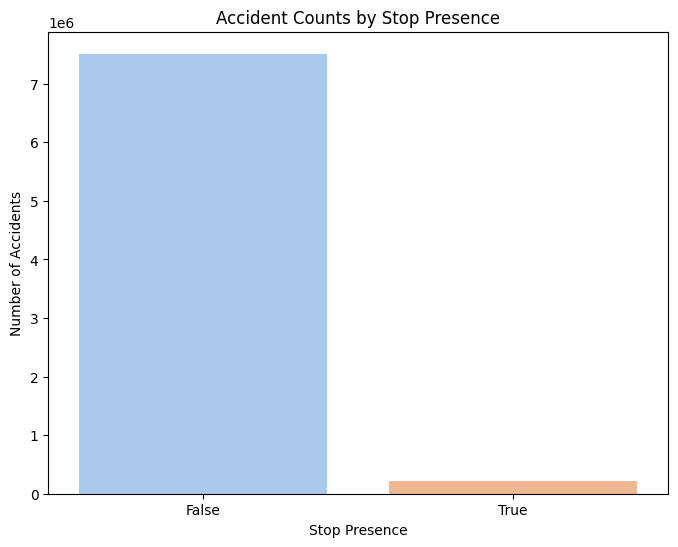

/tmp/ipython-input-3987875166.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


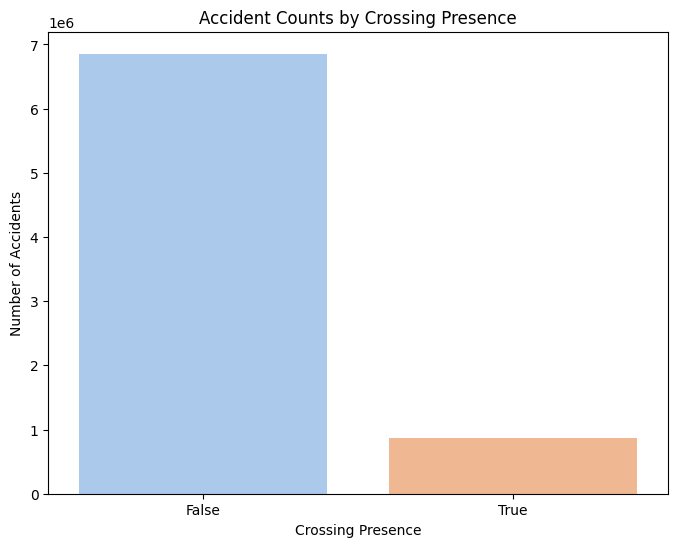

In [36]:
# Count accidents by Traffic Control devices
traffic_features = ['Traffic_Signal', 'Stop', 'Crossing']
traffic_feature_counts = {feature: accident_df[feature].value_counts() for feature in traffic_features}
# Plot the distributions
for feature, counts in traffic_feature_counts.items():
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')
    plt.title(f'Accident Counts by {feature.replace("_", " ")} Presence')
    plt.xlabel(f'{feature.replace("_", " ")} Presence')
    plt.ylabel('Number of Accidents')
    plt.show()